In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline

### CSC 217 - Final Exam

For your final exam, you will be looking at a dataset from FiveThirtyEight that looks at the voting record of each member of the House of Representatives ever since Donald Trump has been elected. There are eight columns: last name, state, party (Republican or Democrat), votes (the total number of votes they cast), votes_for (the total number of votes they made that agreed with Trump's position on the issue), votes_against (the total number of votes they made that disagreed with Trump's position on the issue), vote_percentage (the percentage of their votes that agreed with Trump's position) and GDP (the GDP of the state their district is in). Keep in mind that there are multiple representatives for most states. As an FYI, this data spans records from the last two Congresses (115th and 116th).

The data DOES NOT need to be cleaned beyond what has been provided.

Please write out your answer for each question.

There are 14 total questions and a bonus question. There are 70 possible points - the maximum score possible is 75/70 after the bonus question. Partial credit may be awarded on questions under my discretion.

The exam is due to me (via email - evan.agovino.ccny@gmail.com) by 9 PM on Wednesday, May 22nd. Late submissions will not be accepted.

Good luck and please reach out to me via email or Slack (preferably Slack) with questions.

In [132]:
total_df = pd.read_csv('total_df.csv')
total_df.head()

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
0,Abraham,LA,R,222,208,14,0.936937,53589
1,Adams,NC,D,236,31,204,0.135593,54441
2,Aderholt,AL,R,244,238,6,0.975410,45219
3,Aguilar,CA,D,242,52,190,0.214876,74205
4,Allen,GA,R,244,236,7,0.967213,55832


In [11]:
len(total_df)

531

    1. How many members are in each party? (3 points)

In [20]:
mem_for_republic=total_df[total_df['party'] == 'R']
print('Members for Republic party are: ',len(mem_for_republic))

Members for Republic party are:  275


In [21]:
mem_for_democrat=total_df[total_df['party'] == 'D']
print('Members for Democratic party are: ',len(mem_for_democrat))

Members for Democratic party are:  256


    2. Which state has the most representatives? How many representatives does it have? (4 points)

In [41]:
max_rep = total_df['state'].value_counts()
max_rep_count = total_df['state'].value_counts().max()
print('States with the maximum number of representatives are: ',max_rep.head())

States with the maximum number of representatives are:  CA    61
TX    45
FL    31
NY    31
PA    26
Name: state, dtype: int64


As we can see, California has maximum number of representatives which is 61.

    3. Plot a histogram of the vote percentage for each state and describe what it looks like. (3 points)

Text(0, 0.5, 'States')

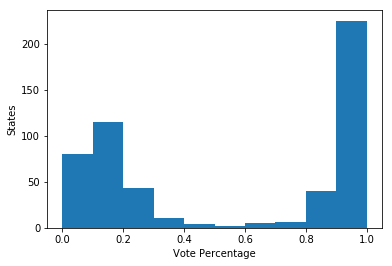

In [186]:
plt.hist(total_df['vote_percentage'])
plt.xlabel('Vote Percentage')
plt.ylabel('States')

From the figure, it looks like vote percentage are not at all evenly dispersed. Histogram seems like bimodal in a sense that they might have been chosen from two different distributions. Looks like the vote percent are concentrated around less than 30% and more than 80%. The range of 30-80% has negligible vote percentage.

    4. What is the maximum vote percentage in the dataset? How many representatives have that maximum vote percentage? (4 points)

In [63]:
max_vote_percent = (total_df['vote_percentage'].max())*100
print('Maximum vote percentage is: ',max_vote_percent)

Maximum vote percentage is:  100.0


In [75]:
max_vote_percent = total_df['vote_percentage'].max()
max_vote_rep = total_df[total_df['vote_percentage'] == max_vote_percent]
max_vote_rep 

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
69,Chaffetz,UT,R,62,62,0,1.0,55550
209,Hern,OK,R,60,60,0,1.0,50613
245,Joyce,PA,R,54,54,0,1.0,61594
330,Miller,WV,R,54,54,0,1.0,43053
366,Pence,IN,R,52,52,0,1.0,55172
402,Rose,TN,R,54,54,0,1.0,53933
461,Steube,FL,R,54,54,0,1.0,48318
530,Zinke,MT,R,2,2,0,1.0,46609


In [78]:
print('Number of representatives that have maximum vote percentage are: ',len(max_vote_rep ))

Number of representatives that have maximum vote percentage are:  8


    5. Find out how many total Republican and Democrat votes were for and against Trump's policies (hint: do a groupby and sum the 'votes_for' and 'votes_against' columns) (4 points)

In [93]:
 total_df.groupby('party')['votes','votes_for','votes_against'].sum()

,votes,votes_for,votes_against
party,,,
D,47956,8163,39779
R,54514,50770,3608


Based on our bimodal histogram and several other factors, our hypothesis goes as:
#### Null Hypothesis: Our dataset is based on same distribution.
#### Alternative hypothesis: Our dataset is based on different distributions.



    6. Now do a chi-squared test for homogeneity on the Democrats vs. Republicans to see if they could conceivably come from the same distribution (hint: use the methodology from this workbook:  https://github.com/CSC217/spring_2019/blob/master/week09-hypothesis_testing_ii/Hypothesis_Testing_II_Workbook.ipynb). What is the Chi-squared score from the test? Can we reject the null hypothesis at a 0.05 signifiance level that Democrats and Republicans come from the same distribution, voting-wise? (8 points)

In [127]:
dems = [total_df[total_df['party'] == 'D']['votes_for'].sum(), total_df[total_df['party'] == 'D']['votes_against'].sum()]
reps = [total_df[total_df['party'] == 'R']['votes_for'].sum(), total_df[total_df['party'] == 'R']['votes_against'].sum()]
stats.chi2_contingency([dems, reps])

(60791.45718371537, 0.0, 1, array([[27613.03641517, 20328.96358483],
        [31319.96358483, 23058.03641517]]))

As the p-value is less than 0.5, we can reject the null hypothesis.

    7. Given the number of degrees of freedom in the test, what would be the minimum Chi-square value necessary to reject the null hypothesis at a 0.05 signifiance level that the Democrats and Republicans come from the same distribution, voting-wise? (8 points)

In [170]:
stats.chi2(1).ppf(0.95)

3.841458820694124

In [ ]:
Also we can observe the similar results fro a two-tailed T-test.

In [165]:
#Get T-Value from Correlation Value
r, p_value = stats.pearsonr(np.power(total_df['vote_percentage'], 1/3), np.log(total_df['gdp']))
t = (r * np.sqrt((total_df.shape[0] - 2) / (1 - np.power(r, 2))))
t

-7.049162834613676

In [166]:
stats.t(530).ppf(0.025)

-1.9644500332359982

In [167]:
stats.t(530).ppf(0.975)

1.9644500332359978

The rejection regions are at -1.96 and 1.96

In [168]:
stats.t(530).cdf(t)

2.8170569480582096e-12

our t-value of -7.056 is outside the rejection region.

In [169]:
(1 - stats.t(530).cdf(t)) * 2

1.9999999999943658

    8. What is the correlation between the GDP of the state a representative is representing and the percentage of time that representative agrees with Trump? Is the correlation statistically significant? (5 points)

In [178]:
stats.spearmanr(total_df['gdp'], total_df['vote_percentage'])

SpearmanrResult(correlation=-0.32972451612060594, pvalue=6.228178841163745e-15)

We have a weak negative correlation between gdp and vote percentage.

    9. Find the linear relationship between GDP and the representative's likely percentage to vote. Plot the sdcatterplot with the predictive line on top of it. (6 points)

In [179]:
Correlation= total_df[['vote_percentage','gdp']]
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals
slope, intercept, predictions, residuals = evaluate_linear_relationship(total_df['gdp'],  total_df['vote_percentage'])

Text(0.5, 0.92, 'GDP Vs Percentage')

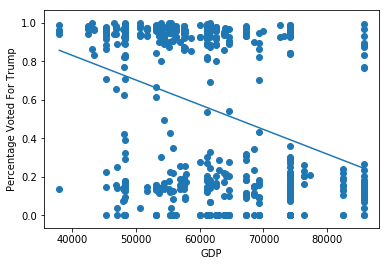

In [180]:
plt.scatter(total_df['gdp'],total_df['vote_percentage'])
sorted_order=np.argsort(total_df['gdp'])
plt.plot(total_df['gdp'][sorted_order],predictions[sorted_order])
plt.xlabel('GDP')
plt.ylabel('Percentage Voted For Trump')
fig.suptitle('GDP Vs Percentage', fontsize=15, y=0.92)

    10. What is the R^2 value of this relationship? (5 points)

In [190]:
print ('The R^2 value is ', np.var(predictions)/ np.var(total_df['vote_percentage'])*100,'%')

The R^2 value is  12.751704893821012 %


    11. If a representative comes from a state with a GDP of $50,000, what is the predicted percentage of time that representative will vote with Trump? (5 points)

In [191]:
percentage= slope *50000+intercept
percentage

0.7029029463887216

The percentage of time is 70.29%

    12. What is the average percentage of time that representatives agreed with Trump given that they came from states with a GDP *greater than* $45,000 and *less than* $55,000? (6 points)

In [192]:
(Correlation[(Correlation['gdp'] >= 45000)&(Correlation['gdp'] < 55000)]).mean()

vote_percentage        0.662005
gdp                50053.464286
dtype: float64

The average percentage of representatives is 66.2%

    13. Plot the residuals plot. Is it homoskedastic or heteroskedastic? (5 points)

Text(0.5, 0.92, 'Residuals')

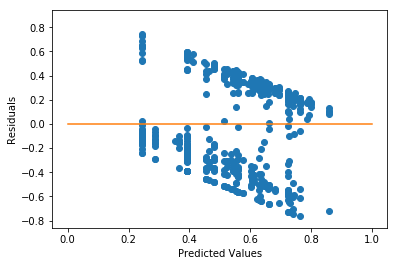

In [196]:
plt.scatter(predictions, residuals)
plt.plot(predictions.min(), predictions.max(), [0,0])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

Since we can observe a clear pattern in the graph, it is heteroskedastic.

    14. Overall do you think there's a linear relationship between these two variables? Why or why not? (4 points)

The relationship between two variables is not linear because of heteroskedasticity. Also we have a very weak correlation which suggest there is no linear correlation between gdp and vote percentage.

    15. *BONUS* Given that the data looks at GDP at the state-level and voting percentage at the representative level, what data would improve this data set? (5 points)

I feel the comparison using gdp is very vaguely appropriate for this dataset. When we say gdp, is it gdp per capita in every individual state or % of gdp in the election regions in the particular states , it's kinda not a good idea to use this gdp data here. Perhaps we could find something better to replace gdp.